Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

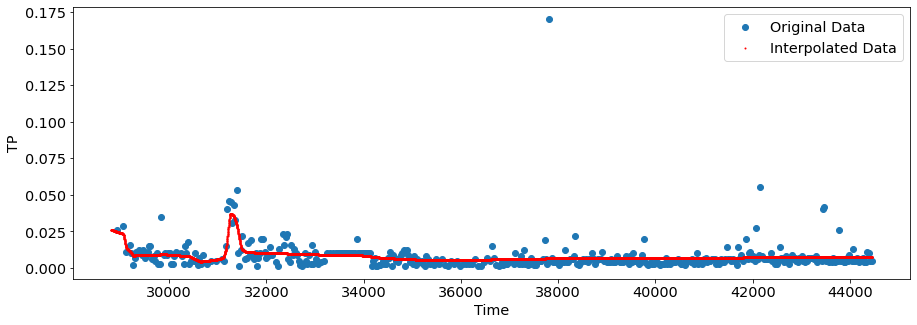

313/313 [==============================] - 0s 356us/step - loss: 6.9132e-18
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//TP/saved_model/my_modelBB17_TP')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/TP_data/BB17.csv")
time = df['time'].values
TP = df['TP'].values
df

#Transform the normalized scale to real scale
TP_min = 0.001
TP_max = 0.17
time_min = 28933.60                     
time_max = 44453.42                         

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(TP_max - TP_min) + TP_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, TP*(TP_max - TP_min) + TP_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('TP')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.421035885
,0.424837475
,0.428767932
,0.43269839
,0.436628847
,0.440559304
,0.444554196
,0.448355786
,0.452286243
,0.4562167
,0.460147158
,0.464077615
,0.468072506
,0.471874096
,0.475804554
,0.479735011
,0.483665468
,0.487595926
,0.491590817
,0.49545684
,0.503317755
,0.83076996
])
interpolation

array([[0.02453771],
       [0.0243893 ],
       [0.02436324],
       [0.0245829 ],
       [0.02480453],
       [0.02502616],
       [0.02525143],
       [0.0254658 ],
       [0.02568743],
       [0.02590917],
       [0.02613098],
       [0.02635278],
       [0.02657822],
       [0.02679275],
       [0.02701455],
       [0.02723635],
       [0.02745815],
       [0.02767996],
       [0.02790539],
       [0.02812356],
       [0.02856717],
       [0.03622397]], dtype=float32)